In [1]:
!pip install python-binance mplfinance

You should consider upgrading via the 'c:\users\hassa\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

In [3]:
apikey = 'B84IU9BoNQmBdL0gVhuqJXC3HqKcdvMQiRo0ArPmaAcBF1GyGz0tqdTuDQD4lMtq'
secretkey = 'EejrIgSXfYTBwd85FD2hQvhM2fO9RRSLhH9xDGTvnTdac3UZvk3EhhRORrpkCj21'

In [4]:
client = Client(apikey, secretkey)

In [5]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.06123000'},
 {'symbol': 'LTCBTC', 'price': '0.00436800'},
 {'symbol': 'BNBBTC', 'price': '0.00929700'},
 {'symbol': 'NEOBTC', 'price': '0.00125200'},
 {'symbol': 'QTUMETH', 'price': '0.00365800'},
 {'symbol': 'EOSETH', 'price': '0.00209300'},
 {'symbol': 'SNTETH', 'price': '0.00002920'},
 {'symbol': 'BNTETH', 'price': '0.00159300'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00018710'},
 {'symbol': 'BNBETH', 'price': '0.15178000'},
 {'symbol': 'BTCUSDT', 'price': '37210.00000000'},
 {'symbol': 'ETHUSDT', 'price': '2278.16000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001870'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [6]:
tickers[1]['price']

'0.00436800'

In [7]:
ticker_df = pd.DataFrame(tickers)

In [8]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.06123000
1,LTCBTC,0.00436800
2,BNBBTC,0.00929700
3,NEOBTC,0.00125200
4,QTUMETH,0.00365800


In [9]:
ticker_df.tail()

,symbol,price
1510,STMXBUSD,0.01952000
1511,HNTBUSD,13.59600000
1512,FTTBUSD,31.13000000
1513,DOCKBUSD,0.10299000
1514,ADABIDR,21009.00


In [10]:
ticker_df.set_index('symbol', inplace=True)

In [11]:
float(ticker_df.loc['BNBUSDT']['price'])

345.69

In [12]:
'''
req = [BNBUSDT, ETHUSDT, ADAUSDT, MATICUSDT]
for x in req:
    xs = str(x)
    x = client.get_order_book(symbol = xs)
'''

d_BNB = client.get_order_book(symbol = 'BNBUSDT') #allows you to retrieve market depth data from Binance. Arguments: ticker code and the limit for the no. of tickers
d_ETH = client.get_order_book(symbol = 'ETHUSDT')
d_ADA = client.get_order_book(symbol = 'ADAUSDT')
d_MATIC = client.get_order_book(symbol = 'MATICUSDT')
#crypto = [d_BNB, d_ADA, d_ETH, d_MATIC]

In [13]:
d_MATIC

{'lastUpdateId': 1224956831,
 'bids': [['1.39097000', '143.60000000'],
  ['1.39094000', '71.80000000'],
  ['1.39093000', '71.80000000'],
  ['1.39091000', '10.80000000'],
  ['1.39066000', '287.20000000'],
  ['1.39064000', '753.80000000'],
  ['1.39063000', '71.80000000'],
  ['1.39060000', '71.80000000'],
  ['1.39057000', '71.80000000'],
  ['1.39055000', '11345.00000000'],
  ['1.39054000', '1795.00000000'],
  ['1.39049000', '749.00000000'],
  ['1.39048000', '7.20000000'],
  ['1.39020000', '407.80000000'],
  ['1.39017000', '514.30000000'],
  ['1.39016000', '1000.00000000'],
  ['1.39011000', '2991.90000000'],
  ['1.39009000', '1519.00000000'],
  ['1.39008000', '2200.00000000'],
  ['1.39004000', '2800.00000000'],
  ['1.39001000', '200.00000000'],
  ['1.38999000', '71.60000000'],
  ['1.38968000', '8000.00000000'],
  ['1.38956000', '709.20000000'],
  ['1.38953000', '108.00000000'],
  ['1.38949000', '5583.20000000'],
  ['1.38935000', '3738.00000000'],
  ['1.38934000', '5500.00000000'],
  ['1.38

In [14]:
#bnb_df.dtypes

In [15]:
#Converting to Pandas Dataframes
''''d = {}
for name in crypto:
    d[name] = pd.DataFrame(name['bids'])
'''    
bnb_df = pd.DataFrame(d_BNB['bids'])
bnb_df.columns = ['Price', 'Volume']
eth_df = pd.DataFrame(d_ETH['bids'])
eth_df.columns = ['Price', 'Volume']
ada_df = pd.DataFrame(d_ADA['bids'])
ada_df.columns = ['Price', 'Volume']
matic_df = pd.DataFrame(d_MATIC['bids'])
matic_df.columns = ['Price', 'Volume']

#d_BNB.head()



In [16]:
#  [
#   [
#     1499040000000,      // Open time | Epochs (Seconds)
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [17]:
#historical klines func allows you to retrieve Spot and Futures OHLCV data from Binance. Parameters: Symbol, Start/End, the interval, the limit and type e.g spot or futures
#OHLCV = Open, High, Low, Close and Volume

hdata_bnb = client.get_historical_klines('BNBUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2017') 
hdata_ada = client.get_historical_klines('ADAUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2017') 
hdata_eth = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2017') 
hdata_matic = client.get_historical_klines('MATICUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2017') 


In [18]:
hdata_matic

[[1556236800000,
  '0.00263000',
  '0.01052000',
  '0.00263000',
  '0.00545000',
  '2251813333.70000000',
  1556323199999,
  '13165943.99965100',
  29783,
  '992882444.00000000',
  '5829864.14588800',
  '0'],
 [1556323200000,
  '0.00543000',
  '0.00586000',
  '0.00516000',
  '0.00521000',
  '440339020.00000000',
  1556409599999,
  '2401118.02948200',
  7591,
  '196839741.60000000',
  '1075229.90979500',
  '0'],
 [1556409600000,
  '0.00521000',
  '0.00527000',
  '0.00434000',
  '0.00442000',
  '457183971.50000000',
  1556495999999,
  '2218764.98535100',
  7463,
  '174578789.20000000',
  '851288.96241000',
  '0'],
 [1556496000000,
  '0.00442000',
  '0.00456000',
  '0.00343000',
  '0.00347000',
  '520557584.60000000',
  1556582399999,
  '2090178.57133000',
  7321,
  '193985377.50000000',
  '776881.25854200',
  '0'],
 [1556582400000,
  '0.00346000',
  '0.00516000',
  '0.00346000',
  '0.00442000',
  '1165706893.80000000',
  1556668799999,
  '5268819.86829800',
  14764,
  '469118811.20000000

In [19]:
hd_bnb_df = pd.DataFrame(hdata_bnb)
hd_ada_df = pd.DataFrame(hdata_ada)
hd_eth_df = pd.DataFrame(hdata_eth)
hd_matic_df = pd.DataFrame(hdata_matic)
hd_matic_df.head()
list_df = [hd_ada_df, hd_bnb_df, hd_eth_df, hd_matic_df]

In [20]:
for df in list_df:
    df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB base asset volume',
                  'TB quote asset volume', 'Ignore']
    

In [21]:
hd_ada_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB base asset volume,TB quote asset volume,Ignore
0,1523923200000,0.25551000,0.28800000,0.23983000,0.24260000,67462293.24000000,1524009599999,17411823.57157960,42568,28228665.39000000,7281513.06137010,0
1,1524009600000,0.24260000,0.26460000,0.24201000,0.26200000,31328095.79000000,1524095999999,7922134.28304330,21684,15082512.84000000,3818068.82632840,0
2,1524096000000,0.26199000,0.27500000,0.25777000,0.27004000,50859980.22000000,1524182399999,13609907.89978870,32600,23934593.69000000,6408750.31190170,0
3,1524182400000,0.27004000,0.30442000,0.26648000,0.30108000,71084276.49000000,1524268799999,20270887.70351350,46506,35262790.18000000,10040840.12777730,0
4,1524268800000,0.30161000,0.30700000,0.26509000,0.28668000,92719842.91000000,1524355199999,26539390.12720960,55256,43517191.79000000,12413648.37070700,0


In [22]:
hd_ada_df.shape

(1159, 12)

In [23]:
hd_ada_df.dtypes

Open Time                 int64
Open                     object
High                     object
Low                      object
Close                    object
Volume                   object
Close Time                int64
Quote Asset Volume       object
Number of Trades          int64
TB base asset volume     object
TB quote asset volume    object
Ignore                   object
dtype: object

In [24]:
#pd.to_numeric(hd_ada_df.columns)

In [25]:
#converting relevant columns to DateTime format
datetime_cols = ['Open Time', 'Close Time']
list_df = [hd_ada_df, hd_bnb_df, hd_eth_df, hd_matic_df]
for val in list_df:
    for col in datetime_cols:
        val[col] = pd.to_datetime(val[col]/1000, unit='s')
    #val['Close Time'] = pd.to_datetime(val['Close Time']/1000, unit='s')


In [26]:
hd_matic_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB base asset volume,TB quote asset volume,Ignore
0,2019-04-26,0.00263000,0.01052000,0.00263000,0.00545000,2251813333.70000000,2019-04-26 23:59:59.999000064,13165943.99965100,29783,992882444.00000000,5829864.14588800,0
1,2019-04-27,0.00543000,0.00586000,0.00516000,0.00521000,440339020.00000000,2019-04-27 23:59:59.999000064,2401118.02948200,7591,196839741.60000000,1075229.90979500,0
2,2019-04-28,0.00521000,0.00527000,0.00434000,0.00442000,457183971.50000000,2019-04-28 23:59:59.999000064,2218764.98535100,7463,174578789.20000000,851288.96241000,0
3,2019-04-29,0.00442000,0.00456000,0.00343000,0.00347000,520557584.60000000,2019-04-29 23:59:59.999000064,2090178.57133000,7321,193985377.50000000,776881.25854200,0
4,2019-04-30,0.00346000,0.00516000,0.00346000,0.00442000,1165706893.80000000,2019-04-30 23:59:59.999000064,5268819.86829800,14764,469118811.20000000,2125649.11569400,0


In [27]:
hd_matic_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB base asset volume,TB quote asset volume,Ignore
780,2021-06-14,1.46641000,1.60000000,1.41349000,1.54737000,372135319.20000000,2021-06-14 23:59:59.999000064,560866632.35564900,956291,188156719.30000000,283678836.58403300,0
781,2021-06-15,1.54793000,1.71000000,1.53300000,1.62868000,504587100.80000000,2021-06-15 23:59:59.999000064,832822413.42087300,1228289,252517062.90000000,416831548.67426800,0
782,2021-06-16,1.62787000,1.63989000,1.44764000,1.47860000,356518743.60000000,2021-06-16 23:59:59.999000064,552349414.87163100,812098,169193381.50000000,262345993.21961800,0
783,2021-06-17,1.47892000,1.55824000,1.45331000,1.50324000,265325604.40000000,2021-06-17 23:59:59.999000064,399639419.11707700,577483,134769136.00000000,203020639.14523800,0
784,2021-06-18,1.50324000,1.51400000,1.38222000,1.39223000,136053908.50000000,2021-06-18 23:59:59.999000064,197472319.44491700,273629,66099498.40000000,95910524.81909500,0


In [28]:
hd_ada_df.dtypes

Open Time                datetime64[ns]
Open                             object
High                             object
Low                              object
Close                            object
Volume                           object
Close Time               datetime64[ns]
Quote Asset Volume               object
Number of Trades                  int64
TB base asset volume             object
TB quote asset volume            object
Ignore                           object
dtype: object

In [34]:
#converting relevant columns to numeric format
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB base asset volume', 'TB quote asset volume']
for val in list_df:
    val[numeric_cols] = val[numeric_cols].apply(pd.to_numeric, axis=1)
    #for col in datetime_cols:
     #   val[col] = pd.to_numeric(val[col]/1000, unit='s')

In [35]:
hd_ada_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB base asset volume,TB quote asset volume,Ignore
1154,2021-06-14,1.5563,1.5950,1.5056,1.5769,2.807912e+08,2021-06-14 23:59:59.999000064,4.354533e+08,595345,1.380091e+08,2.141063e+08,0
1155,2021-06-15,1.5769,1.6109,1.5441,1.5552,2.161591e+08,2021-06-15 23:59:59.999000064,3.403830e+08,486601,1.047466e+08,1.649590e+08,0
1156,2021-06-16,1.5550,1.5754,1.4740,1.4851,2.035805e+08,2021-06-16 23:59:59.999000064,3.096947e+08,499540,9.377405e+07,1.427668e+08,0
1157,2021-06-17,1.4851,1.5388,1.4568,1.4826,1.650788e+08,2021-06-17 23:59:59.999000064,2.470861e+08,443396,8.339982e+07,1.248771e+08,0
1158,2021-06-18,1.4825,1.4927,1.4481,1.4522,8.826584e+07,2021-06-18 23:59:59.999000064,1.297753e+08,185279,4.207028e+07,6.185256e+07,0


In [36]:
hd_ada_df.dtypes

Open Time                datetime64[ns]
Open                            float64
High                            float64
Low                             float64
Close                           float64
Volume                          float64
Close Time               datetime64[ns]
Quote Asset Volume              float64
Number of Trades                  int64
TB base asset volume            float64
TB quote asset volume           float64
Ignore                           object
dtype: object

In [37]:
hd_ada_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB base asset volume,TB quote asset volume
count,1159.000000,1159.000000,1159.000000,1159.000000,1.159000e+03,1.159000e+03,1.159000e+03,1.159000e+03,1.159000e+03
mean,0.234499,0.247801,0.220356,0.235533,3.021996e+08,1.265840e+08,1.782881e+05,1.498157e+08,6.302614e+07
std,0.408862,0.435120,0.380382,0.410422,3.079066e+08,3.490772e+08,3.962489e+05,1.541300e+08,1.748313e+08
min,0.023320,0.026500,0.017650,0.023290,2.540792e+07,9.955444e+05,4.886000e+03,1.288753e+07,4.958391e+05
25%,0.045965,0.047620,0.044340,0.045950,1.134364e+08,6.897643e+06,2.331800e+04,5.713742e+07,3.424658e+06
50%,0.082270,0.084500,0.078440,0.082310,2.045755e+08,1.555738e+07,4.249200e+04,1.009029e+08,7.875549e+06
75%,0.146440,0.154080,0.138890,0.146475,3.582850e+08,3.829187e+07,9.200100e+04,1.788024e+08,1.909999e+07
max,2.300200,2.470000,2.010400,2.300200,2.261842e+09,3.616451e+09,3.500994e+06,1.102080e+09,1.764043e+09


In [38]:
hd_ada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Open Time              1159 non-null   datetime64[ns]
 1   Open                   1159 non-null   float64       
 2   High                   1159 non-null   float64       
 3   Low                    1159 non-null   float64       
 4   Close                  1159 non-null   float64       
 5   Volume                 1159 non-null   float64       
 6   Close Time             1159 non-null   datetime64[ns]
 7   Quote Asset Volume     1159 non-null   float64       
 8   Number of Trades       1159 non-null   int64         
 9   TB base asset volume   1159 non-null   float64       
 10  TB quote asset volume  1159 non-null   float64       
 11  Ignore                 1159 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory u

In [39]:
import mplfinance as mpf

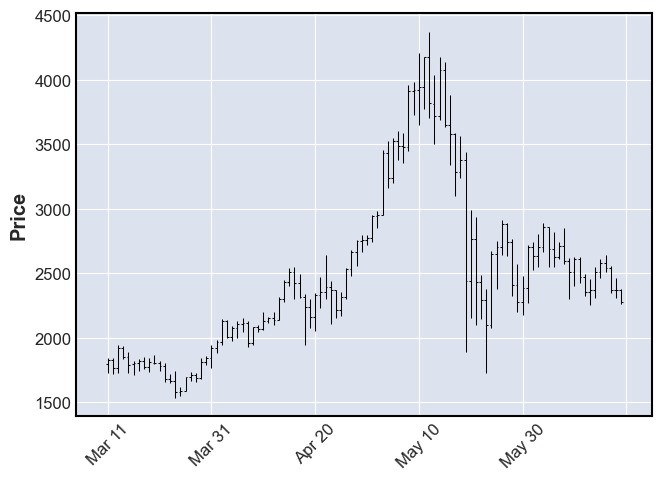

In [43]:
mpf.plot(hd_eth_df.set_index('Close Time').tail(100))